# Finance Data Project 

In this data project is focused on exploratory data analysis of stock prices. it is not meant to be a robust financial analysis or be taken as financial advice.

It is focused on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

I have used Yahoo Finances for the Data



In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

I used the stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [3]:
BAC = data.DataReader('BAC', 'yahoo', start, end)
C = data.DataReader('C','yahoo',start,end)
GS = data.DataReader('GS','yahoo',start,end)
JPM = data.DataReader('JPM','yahoo',start,end)
MS = data.DataReader('MS','yahoo',start,end)
WFC = data.DataReader('WFC','yahoo',start,end)

In [7]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.953278
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,35.571438
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,35.617275
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,35.563797
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,35.586720


In [5]:
#ticker symbols for bank
tickers = ['BAC','C','GS','JPM','MS','WFC']


Cocadinating the data from alll the banks

In [6]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.953278   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  35.571438   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  35.617275   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  35.563797   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  35.586720   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  38.292645  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  38.318924  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  38.423988  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  38.463394  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  38.870537  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  21.485973  
2006-01-04  31.530001  10870000.0  21.236753  
2006-01-05  31.495001  10158000.0  21.213186  
2006-01-06  31.680000   8403800.0  21.337786  
2006-01-09  31.674999   5619600.0  21.334421  

[5 rows x 36 columns]

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [9]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.953278  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.571438  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.617275  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.563797  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.586720  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  38.560352  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  38.586811  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  38.692612  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  38.732288  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  39.142277  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  21.485973  
2006-01-04   31.799999  31.530001  10870000.0  21.236753  
2006-01-05   31.500000  31.495001  10158000.0  21.213186  
2006-01-06   31.580000  31.680000   8403800.0  21.337786  
2006-01-09   31.674999  31.674999   5619600.0  21.334421  

[5 rows x 36 columns]

# EDA


 What is the max Close price for each bank's stock throughout the time period?

In [10]:
for tick in tickers:
    max = bank_stocks[tick]['Close'].max() 
    print(tick,max) #using loop

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


In [11]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()#using xs

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [8]:
returns = pd.DataFrame()

In [9]:
for tick in tickers:
    returns[tick + 'return']=bank_stocks[tick]['Close'].pct_change()


In [14]:
returns.head()

,BACreturn,Creturn,GSreturn,JPMreturn,MSreturn,WFCreturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [13]:
import seaborn as sns


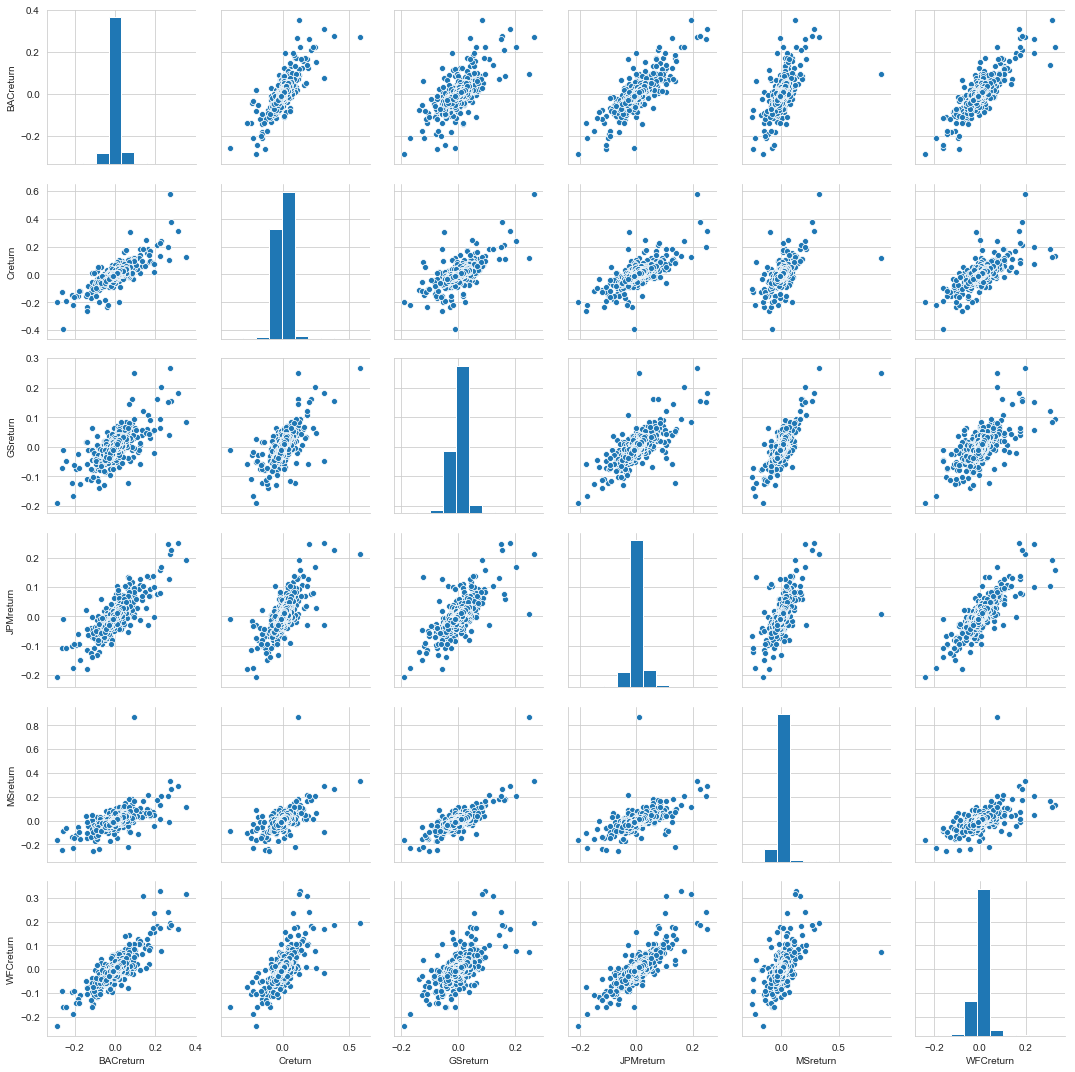

In [28]:
sns.pairplot(returns[1:])

### Best and the worst day of banks

In [10]:
returns.idxmin()

BACreturn   2009-01-20
Creturn     2009-02-27
GSreturn    2009-01-20
JPMreturn   2009-01-20
MSreturn    2008-10-09
WFCreturn   2009-01-20
dtype: datetime64[ns]

**Observation:** 4 banks are having same worse days that is 2009-20-01.
On checking that day on internet it seems that it was inaugration date of Barack Obama. It seems it just an effect of a big political change.

In [11]:
returns.idxmax()

BACreturn   2009-04-09
Creturn     2008-11-24
GSreturn    2008-11-24
JPMreturn   2009-01-21
MSreturn    2008-10-13
WFCreturn   2008-07-16
dtype: datetime64[ns]

**Observation:** JP Morgan had its biggest returns the next day of its worst returns so we can say it was just a fuctuation due to the change in the Predidency.


#### Year 2015 riskiest bank?

In [18]:
returns.std()

BACreturn    0.036647
Creturn      0.038672
GSreturn     0.025390
JPMreturn    0.027667
MSreturn     0.037819
WFCreturn    0.030238
dtype: float64

In [23]:
returns.loc['2015-01-01':'2015-12-31'].std()

BACreturn    0.016163
Creturn      0.015289
GSreturn     0.014046
JPMreturn    0.014017
MSreturn     0.016249
WFCreturn    0.012591
dtype: float64

**Observation** It seems ever bank had similar risk. But we can say Morgan Stanley was riskiest.

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

In [16]:
sns.set_style('darkgrid')

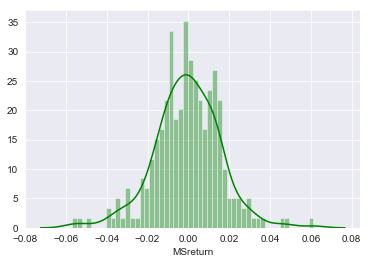

In [17]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSreturn'] ,color ='green',bins =50)

**Observation:** It seems stable with deviation stretched out till 0.06.

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

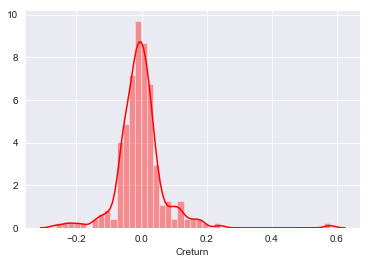

In [19]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['Creturn'],color='red')

**Observation:** It is not very stable with deviation streaching out till 0.6. It is 10 times more than 2015 Morgan Stanley. On checking the internet this due to the Citigroup colapse and intervention of US government in 2008.

____
# More Visualization


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time.**

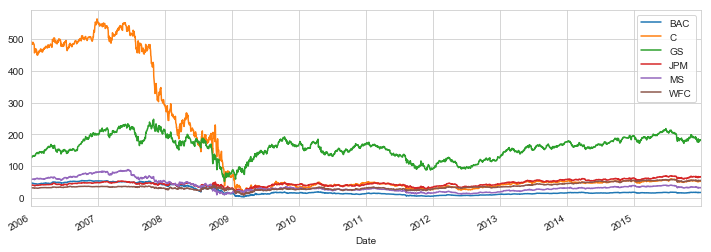

In [53]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend() #with loops

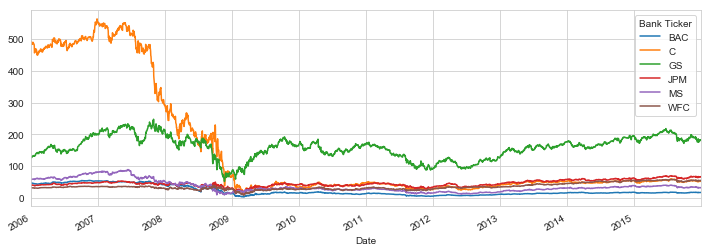

In [54]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))#without loop

**Observation:** Th effects of the financial crisis from late 2007 to 2008 can be clearly seen and Citigroup was affected the most.

In [21]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot() #using plotly

## Moving Averages



**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

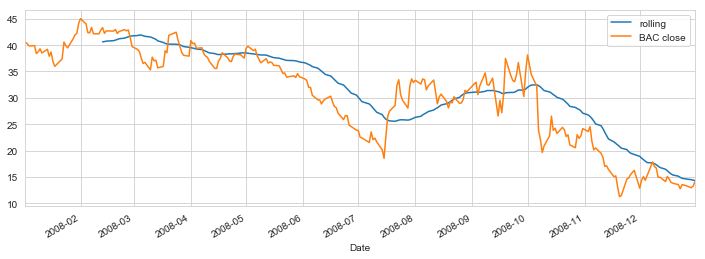

In [66]:
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='rolling',figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC close')
plt.legend()

**Create a heatmap of the correlation between the stocks Close Price.**

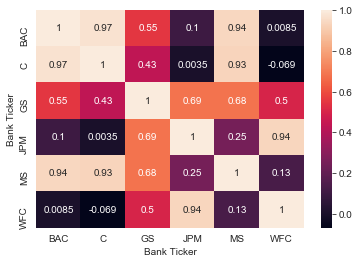

In [75]:
sns.heatmap(bank_stocks.xs(key='Close',level='Stock Info',axis=1).corr(),annot=True)

**clustermap to cluster the correlations together:**

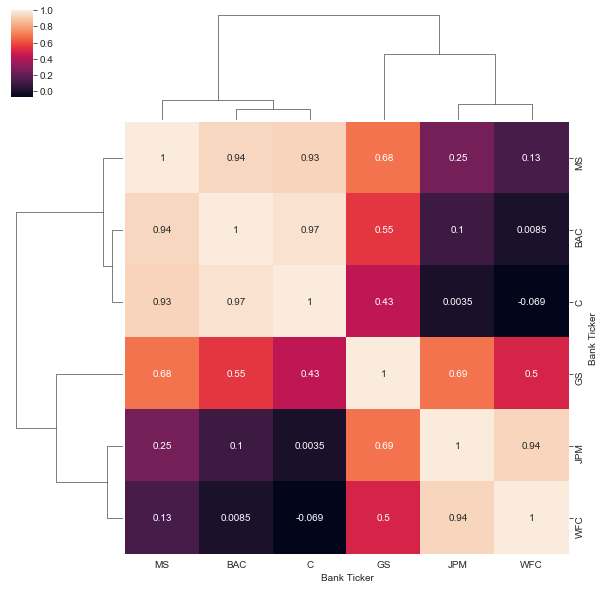

In [76]:
sns.clustermap(bank_stocks.xs(key='Close',level='Stock Info',axis=1).corr(),annot=True)

In [22]:
close_corr=bank_stocks.xs(key='Close',level='Stock Info',axis=1).corr()

In [23]:
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

**Create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [24]:
BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

**Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [25]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',period=[10,100,15])

**Bollinger Band Plot for Bank of America for the year 2015.**

In [26]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# All Observations:

**Observation 1:** 4 banks are having same worse days that is 2009-20-01. On checking that day on internet it seems that it was inaugration date of Barack Obama. It seems it just an effect of a big political change.

**Observation 2:** JP Morgan had its biggest returns the next day of its worst returns so we can say it was just a fuctuation due to the change in the Predidency.

**Observation 3:** It seems ever bank had similar risk in 2015. But we can say Morgan Stanley was riskiest.

**Observation 4:** It seems stable with deviation stretched out till 0.06 for Morgan Stanley 2015.

**Observation 5:** It is not very stable with deviation streaching out till 0.6 for Citigroup 2008. It is 10 times more than 2015 Morgan Stanley. On checking the internet this due to the Citigroup colapse and intervention of US government in 2008.

**Observation 6:** Th effects of the financial crisis from late 2007 to 2008 can be clearly seen in thee line plot and Citigroup was affected the most.



